# Lab 1 - Week 1

## Tasks:


1. In util.py:
    - Fill in code for local_mean()
    - Fill in code for local_std()
    - Fill in code for wallis()

2. Find appropriate filtering parameters using a cropped version of the image for speed. What effect does each parameter have?

3. Compare results of Wallis filtering on image before and after denoising

In [23]:
# Rodrigo Caye Daudt
# rodrigo.cayedaudt@geod.baug.ethz.ch
# 02/2021

from skimage import io
from skimage import util as skutil
from skimage import exposure
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

# import utils_solution as utils # to be used when solution is given
import utils

# Use this so that updated functions in other files are automatically reloaded without needing to restart kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set filter parameters

In [26]:
# General paramenters
CROP_IMG = False # For faster execution
VERBOSE = True
# DISPLAY_IMAGES = True # Set to False when processing large images
DISPLAY_IMAGES = CROP_IMG # For safety, use line above if you want manual control

# Choose image file
IMG_PATH = './data/01-image_original.tif' # cropped image for testing different parameters
# IMG_PATH = './data/02-image_denoised.tif' # denoised cropped image
IMG_PATH = './data/03-image_full.tif' # full image

# Filter parameters
window_radius = 10 #10 #24
window_size = 2 * window_radius + 1 # Be careful, some of the operations are O(window_size**2)
target_mean = 132#127#130
target_std = 65#55
b = 1# .9#.8#0.95#1 # brightness enforcing constant
c = .96#.94#1#0.85##0.94 # contrast enforcing constant
b, c, target_mean, target_std = 1, 1, 132, 43.854001793118414
b, c, target_mean, target_std = 0.963, 0.945, 129.478, 78.204
# b, c, target_mean, target_std = 0.987, 0.934, 126.143, 77.1
# denoised:
# b, c, target_mean, target_std = 1, .94, 127, 40
# fine-tuned parameters
b, c, target_mean, target_std = 0.982, 0.945, 123.909, 78.713


## There's no need to change anything beyond this point
## Go to utils.py to fill in necessary code

In [27]:
# Load image data
if VERBOSE:
    print('Loading image...')
I = np.array(io.imread(IMG_PATH), dtype=float)

# Crop image data for faster testing
if CROP_IMG:
    I = I[:600, :600] 
    
if DISPLAY_IMAGES:
    io.imshow(I / 255)

Loading image...


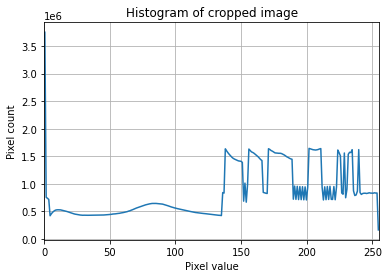

In [28]:
# Calculate histogram
orig_hist, orig_bin_centers = exposure.histogram(I)
fig = plt.figure()
plt.plot(orig_bin_centers, orig_hist)
plt.xlabel('Pixel value')
plt.ylabel('Pixel count')
plt.xlim(0,255)
plt.grid()
plt.title('Histogram of cropped image')
if not os.path.exists('./outputs'):
    os.mkdir('./outputs')
plt.savefig('./outputs/histogram_crop.pdf')
plt.savefig('./outputs/histogram_crop.png')

In [29]:
# Calculate features
if VERBOSE:
    print('Calculating mean...')
I_mean = utils.local_mean(I, window_size)

if DISPLAY_IMAGES:
    io.imshow(I_mean)

Calculating mean...


In [ ]:
if VERBOSE:
    print('Calculating standard deviation...')
I_std = utils.local_std(I, window_size, E_x = I_mean)

if DISPLAY_IMAGES:
    io.imshow(I_std)

Calculating standard deviation...


In [ ]:
# Perform Wallis filtering
if VERBOSE:
    print('Applying Wallis filter...')
I_wallis = utils.wallis(I, I_mean, I_std, b, c, target_mean, target_std)

if DISPLAY_IMAGES:
    io.imshow(I_wallis / 255)

In [16]:
# Save output
if VERBOSE:
    print('Saving result...')
if not os.path.exists('./outputs'):
    os.mkdir('./outputs')
out_path = IMG_PATH.replace('./data', 'outputs').replace('.tif', '_wallis_b-{}_c-{}_tm-{}_ts-{}_ws-{}.tif'.format(b, c, target_mean, target_std, window_size))
io.imsave(out_path, I_wallis.astype('uint8'))

Saving result...


In [15]:
out_path

'../outputs/01-image_original_wallis_b-0.982_c-0.945_tm-123.909_ts-78.713_ws-21.tif'

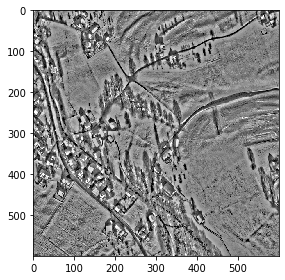

In [17]:
target = np.array(io.imread('./data/04-L1W1_solution.tif'), dtype=float)

# Crop image data for faster testing
if CROP_IMG:
    target = target[:600, :600] 
    
if DISPLAY_IMAGES:
    io.imshow(target / 255)

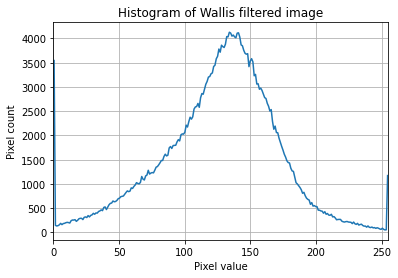

In [18]:
def calculate_histogram(b, c, target_mean, target_std, window_size):
    # Calculate histogram
    orig_hist, orig_bin_centers = exposure.histogram(I_wallis)
    fig = plt.figure()
    plt.plot(orig_bin_centers, orig_hist)
    plt.xlabel('Pixel value')
    plt.ylabel('Pixel count')
    plt.xlim(0,255)
    plt.grid()
    plt.title('Histogram of Wallis filtered image')
    if not os.path.exists('./outputs'):
        os.mkdir('./outputs')
    # plt.savefig('./outputs/histogram_wallis.pdf')
    im = 'original' if 'original' in IMG_PATH else 'denoised'
    error = ''
    im += 'cropped' if CROP_IMG else ''
    if CROP_IMG:
        error = int(np.sum(np.square((target-I_wallis)/255)))

    out_path = 'outputs/histogram_{}_wallis_err_{}_b-{}_c-{}_tm-{}_ts-{}_ws-{}.png'.format(im, error, b, c, target_mean, target_std, window_size)
    plt.savefig(out_path)
    # plt.savefig('./outputs/histogram_wallis.png')
calculate_histogram(b, c, target_mean, target_std, window_size)

Text(0.5, 1.0, 'Histogram of cropped target image')

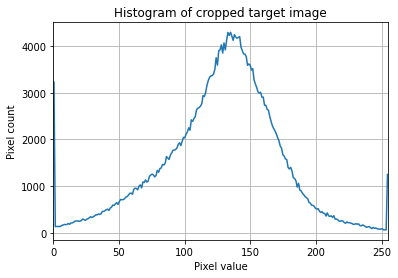

In [19]:
# Calculate histogram
orig_hist, orig_bin_centers = exposure.histogram(target)
fig = plt.figure()
plt.plot(orig_bin_centers, orig_hist)
plt.xlabel('Pixel value')
plt.ylabel('Pixel count')
plt.xlim(0,255)
plt.grid()
plt.title('Histogram of cropped target image')

## Evaluation

In [20]:
targets_mean = np.mean(target)
targets_median = np.median(target)
target_zeros, target_fulls = np.sum(target == 0), np.sum(target == 255)
targets_mean, targets_median, target_zeros, target_fulls


(127.42558333333334, 132.0, 3228, 1251)

In [21]:
np.mean(I_wallis), np.median(I_wallis), np.std(I_wallis),\
np.sum(I_wallis == 0), np.sum(I_wallis == 255)

(126.31298489752062, 130.79301922559625, 44.21716760603802, 3410, 1104)

In [22]:
# Mean absolute error between the target image and wallis filtered image
np.mean(np.abs(target-I_wallis))

1.261398139680046

## Hyper-parameter Search

In [ ]:
window_radi  = np.array([10])#, 15, 20, 24])
window_sizes = 2*window_radi + 1
parameters = {# Filter parameters
    # 'window_size' : 2 * window_radius + 1 # Be careful, some of the operations are O(window_size**2)
    'b' : [.9, 1],# .9#.8#0.95#1 # brightness enforcing constant
    'c' : [.9, 1],#.94#1#0.85##0.94 # contrast enforcing constant
    'target_mean' : [120, 140],
    'target_std' : [40, 80],
}
errors = []
for window in window_sizes:
    print('--'*10)
    print('Current window size: ', window)
    print('Parameters', parameters)
    for i in range(500):
        params = []
        for p, vals in parameters.items():
            a, b = vals[0], vals[-1]
            val = np.random.random() * (b - a) + a
            val = float('{0:.3f}'.format(val))
            params.append(val)
        I_mean = utils.local_mean(I, window)
        I_std = utils.local_std(I, window, E_x = I_mean)
        I_wallis = utils.wallis(I, I_mean, I_std, *params)
#         calculate_histogram(b, c, target_mean, target_std, window_size)
        
        zeros = np.sum(I_wallis==0)
        fulls = np.sum(I_wallis==255)
        mean, median = np.mean(I_wallis), np.median(I_wallis)
        error = int(np.sum(np.square((target-I_wallis)/255)))
        errors.append((error, params, window, zeros, fulls, mean, median))
        im = 'original' if 'original' in IMG_PATH else 'denoised'
        report = 'b:{}\tc:{}\ttm:{}\tts:{}\tws:{} \t\terror:{}\t0:{}\t255:{}\tmean:{}\tmedian:{}'.format(
            *params, window, error, zeros, fulls, mean, median)
        print(report)
errors.sort(key=lambda x: x[0])


In [ ]:
params
def pr(b, c, tm, ts):
    print(b, c, tm, ts)
    return b, c, tm ,ts
params, pr(*params)

In [ ]:
def tails(r):
    zeros, fulls = r[-2], r[-1]
    return abs(zeros-target_zeros) < 1000 and abs(fulls-target_fulls) < 1000

with open('outputs/res.txt', 'a') as file:
    file.write(str(parameters))
    for r in errors[:6] + list(filter(tails, errors)): 
        error, params, window, zeros, fulls, mean, meadian = r
        b, c, target_mean, target_std = params
        report = '{}\tb:{}\tc:{}\ttm:{}\tts:{}\tws:{} \t\terror:{}\t0:{}\t255:{}\tmean:{}\tmedian:{}\n'.format(
            im, *params, window, error, zeros, fulls, mean, median)
        file.write(report)
